<a href="https://colab.research.google.com/github/Divyaanshvats/Time-series-Rnn/blob/main/TIME_SERIES_WITH_RNN(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ForeTemp: Neural Prediction of Temperature Trends**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [ ]:
csv_path = '/root/.keras/datasets/jena_climate_2009_2016_extracted/jena_climate_2009_2016.csv'
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df=df[2::3]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
14,01.01.2009 02:30:00,996.81,-8.66,264.74,-9.46,93.90,3.17,2.98,0.19,1.86,2.99,1311.37,0.33,0.75,155.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420536,31.12.2016 21:40:00,1001.00,-2.48,270.60,-6.97,71.10,5.09,3.62,1.47,2.25,3.61,1286.50,0.62,1.02,30.62
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.70
420542,31.12.2016 22:40:00,1000.45,-4.45,268.68,-7.15,81.30,4.39,3.57,0.82,2.22,3.57,1295.24,0.80,1.44,183.80
420545,31.12.2016 23:10:00,1000.11,-3.93,269.23,-8.09,72.60,4.56,3.31,1.25,2.06,3.31,1292.41,0.56,1.00,202.60


In [ ]:
df.index=pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
2009-01-01 02:30:00,01.01.2009 02:30:00,996.81,-8.66,264.74,-9.46,93.90,3.17,2.98,0.19,1.86,2.99,1311.37,0.33,0.75,155.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 21:40:00,31.12.2016 21:40:00,1001.00,-2.48,270.60,-6.97,71.10,5.09,3.62,1.47,2.25,3.61,1286.50,0.62,1.02,30.62
2016-12-31 22:10:00,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.70
2016-12-31 22:40:00,31.12.2016 22:40:00,1000.45,-4.45,268.68,-7.15,81.30,4.39,3.57,0.82,2.22,3.57,1295.24,0.80,1.44,183.80


## **DATA VISUALIZATION**

<Axes: xlabel='Date Time'>

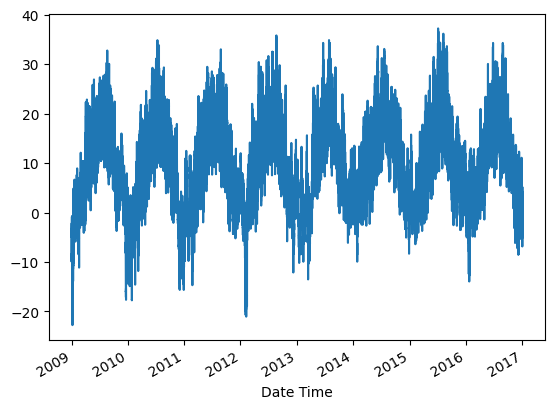

In [ ]:
temp=df['T (degC)']
temp.plot()

<Axes: xlabel='Date Time'>

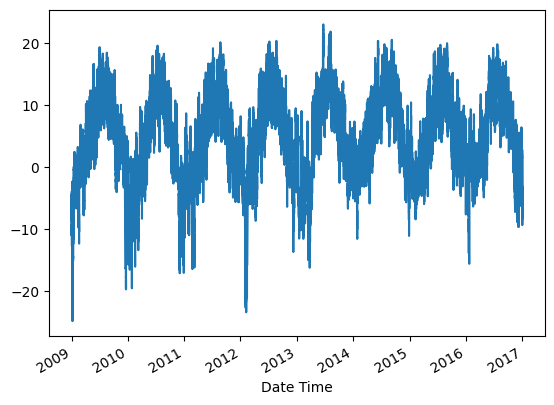

In [ ]:
temp1=df['Tdew (degC)']
temp1.plot()

## **SPLITTING THE DATA**

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((140178, 5, 1), (140178,))

In [ ]:
X_train1, y_train1 = X1[:100000], y1[:100000]
X_val1, y_val1 = X1[100000:120000], y1[100000:120000]
X_test1, y_test1 = X1[120000:], y1[120000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((100000, 5, 1), (100000,), (20000, 5, 1), (20000,), (20178, 5, 1), (20178,))

## **MODEL TRAINING**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001),metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 11.2050 - root_mean_squared_error: 2.8244 - val_loss: 0.2677 - val_root_mean_squared_error: 0.5173
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - loss: 0.2698 - root_mean_squared_error: 0.5194 - val_loss: 0.2530 - val_root_mean_squared_error: 0.5030
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.2554 - root_mean_squared_error: 0.5053 - val_loss: 0.2667 - val_root_mean_squared_error: 0.5165
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.2579 - root_mean_squared_error: 0.5078 - val_loss: 0.2460 - val_root_mean_squared_error: 0.4960
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.2572 - root_mean_squared_error: 0.5072 - val_loss: 0.2644 - val_root_mean_squared_error: 0.5142
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.2532 - root_mean_squared_error: 0.5032 - val_loss: 0.3078 - val_root_mean_squared_error: 0.5548
Epoch 7/10
3125/3125 ━━━━━━━━━━━━

## **TRAINING THE DATA**

In [ ]:
train_prediction=model1.predict(X_train1).flatten()
train_results=pd.DataFrame(data={'Train Predictions':train_prediction, 'Actual':y_train1, 'diff':y_train1-train_prediction})
train_results

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


,Train Predictions,Actual,diff
0,-9.032534,-8.81,0.222534
1,-9.004719,-8.94,0.064719
2,-9.193918,-9.05,0.143918
3,-9.306634,-9.50,-0.193366
4,-9.909243,-9.63,0.279243
...,...,...,...
99995,14.723286,14.73,0.006714
99996,14.644087,14.73,0.085913
99997,14.657255,14.69,0.032745
99998,14.618258,14.64,0.021742


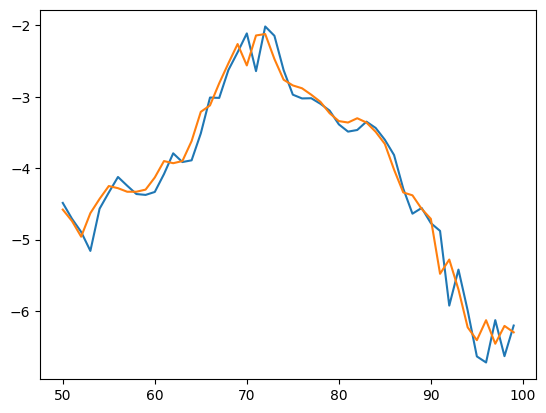

In [ ]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actual'][50:100])

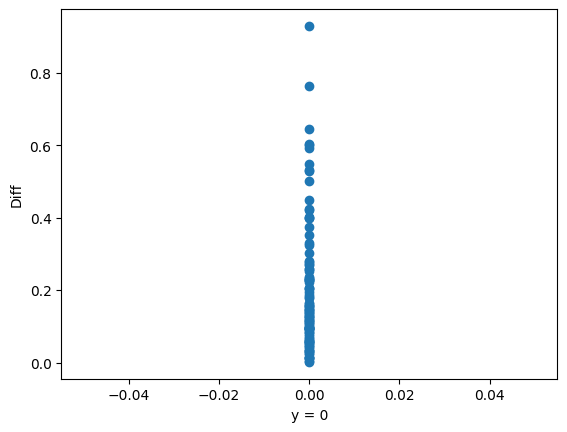

In [ ]:
x_values = np.zeros(len(train_results['diff'][0:100]))
plt.scatter(x_values, abs(train_results['diff'][0:100]))
plt.xlabel("y = 0")
plt.ylabel("Diff")
plt.show()

## **VALIDATING THE DATA**

In [ ]:
val_prediction=model1.predict(X_val1).flatten()
validate_results=pd.DataFrame(data={'Validate Predictions':val_prediction, 'Actual':y_val1, 'diff':y_val1-val_prediction})
validate_results

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Validate Predictions,Actual,diff
0,14.431840,14.45,0.018160
1,14.342860,14.41,0.067140
2,14.313575,14.40,0.086425
3,14.323507,14.27,-0.053507
4,14.173124,14.24,0.066876
...,...,...,...
19995,5.444005,5.99,0.545995
19996,6.898067,6.07,-0.828067
19997,6.517125,7.44,0.922875
19998,8.155128,9.88,1.724872


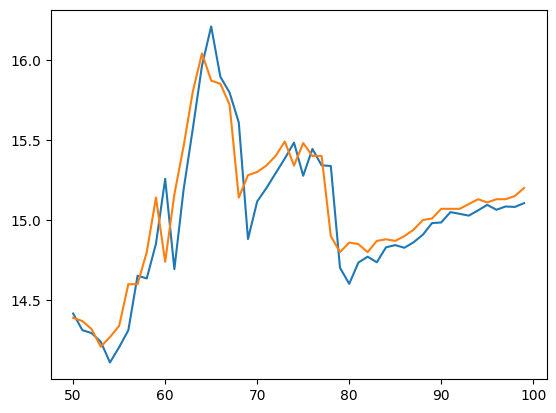

In [ ]:
plt.plot(validate_results['Validate Predictions'][50:100])
plt.plot(validate_results['Actual'][50:100])

## **TESTING THE DATA**

In [ ]:
test_prediction=model1.predict(X_test1).flatten()
test_results=pd.DataFrame(data={'test Predictions':test_prediction, 'Actual':y_test1, 'diff':y_test1-test_prediction})
test_results

631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,test Predictions,Actual,diff
0,13.383862,13.53,0.146138
1,14.694502,15.11,0.415498
2,16.132744,15.43,-0.702744
3,16.163986,15.45,-0.713986
4,15.816664,15.54,-0.276664
...,...,...,...
20173,-3.027167,-2.48,0.547167
20174,-2.478282,-2.89,-0.411718
20175,-3.105456,-4.45,-1.344544
20176,-5.054630,-3.93,1.124630


## **DIFFERENCE FROM THE ORIGINAL**

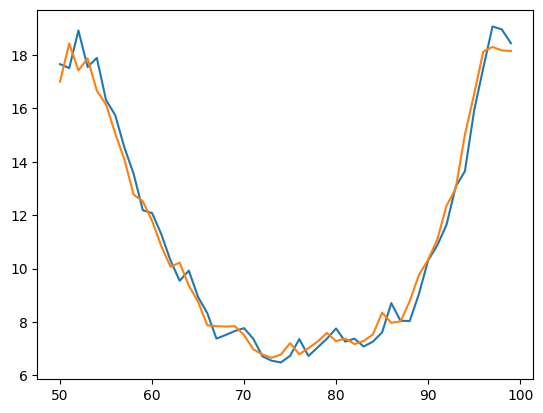

In [48]:
plt.plot(test_results['test Predictions'][50:100])
plt.plot(test_results['Actual'][50:100])

## **LOSS**

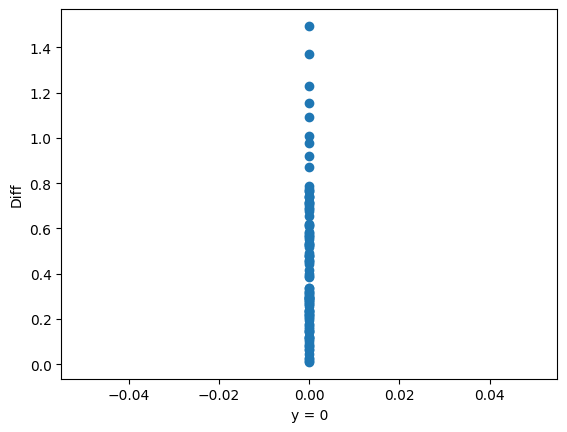

In [49]:
x_values = np.zeros(len(test_results['diff'][0:100]))
plt.scatter(x_values, abs(test_results['diff'][0:100]))
plt.xlabel("y = 0")
plt.ylabel("Diff")
plt.show()